# KNN **Numpy only Vs. Sklearn**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.metrics import accuracy_score

from collections import Counter
import time

## Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()

In [4]:
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Numpy only

In [6]:
import numpy as np

In [7]:
class KNN:
    def __init__(self, n_neighbors=3, distance='euclidean'):
        self.n_neighbors = n_neighbors
        self.distance = distance

        self._distance_functions = {
            'euclidean': self._euclidean,
            'manhattan': self._manhattan
        }

        if distance not in self._distance_functions:
            raise ValueError(f"Unsupported distance metric: {distance}")

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    # --- Distance functions ---
    @staticmethod
    def _euclidean(X, x):
        return np.sqrt(np.sum((X - x) ** 2, axis=1))

    @staticmethod
    def _manhattan(X, x):
        return np.sum(np.abs(X - x), axis=1)

    # --- Core logic ---
    def _predict_single(self, x):
        distance_fn = self._distance_functions[self.distance]
        distances = distance_fn(self.X_train, x)

        k_idx = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_idx]

        return Counter(k_labels).most_common(1)[0][0]


In [8]:
knn_np = KNN() # k = 3
start_time = time.time()
knn_np.fit(X_train, y_train)
y_pred_np = knn_np.predict(X_test)
numpy_time = time.time() - start_time

In [12]:
numpy_accuracy = accuracy_score(y_test, y_pred_np)
print(f"NumPy KNN Accuracy: {numpy_accuracy:.4f}, Time: {numpy_time:.4f}s")

NumPy KNN Accuracy: 0.8000, Time: 0.0039s


## Scikit-Learn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
knn_sk = KNeighborsClassifier() # k = 3
start_time = time.time()
knn_sk.fit(X_train, y_train)
y_pred_sk = knn_sk.predict(X_test)
sklearn_time = time.time() - start_time

In [16]:
sklearn_accuracy = accuracy_score(y_test, y_pred_sk)
print(f"Sklearn KNN Accuracy: {sklearn_accuracy:.4f}, Time: {sklearn_time:.4f}s")

Sklearn KNN Accuracy: 0.8000, Time: 0.0140s


## Visualization & Analysis

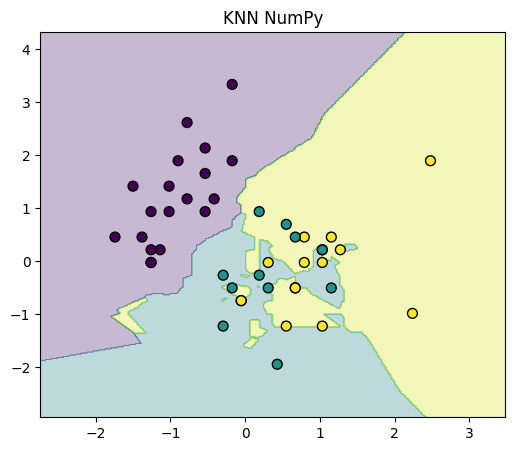

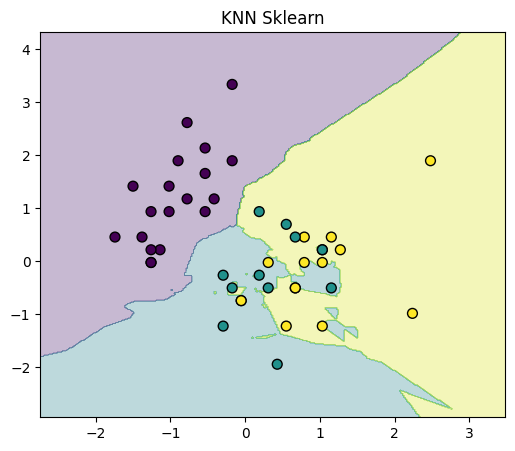

In [18]:
def plot_decision_boundary(model, X, y, title, filename):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    plt.title(title)
    plt.savefig(filename)
    plt.show()

plot_decision_boundary(knn_np, X_test, y_test, "KNN NumPy", "results/knn/knn_numpy.png")
plot_decision_boundary(knn_sk, X_test, y_test, "KNN Sklearn", "results/knn/knn_sklearn.png")

In [19]:
X_test_stable = X_test * 1e6
y_pred_numpy_stable = knn_np.predict(X_test_stable)
y_pred_sklearn_stable = knn_sk.predict(X_test_stable)

y_pred_numpy_stable == y_pred_sklearn_stable

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

| Aspect             | NumPy | Scikit-learn |
|-------------------|-------|--------------|
| Abstraction        | Medium (class-based, manual) | High (ready-made, modular) |
| Performance        | Medium (Python loop) | High (C/Fortran optimized) |
| Numerical Stability| Depends on data scaling | High (robust) |
| API Design         | Custom fit/predict | Standardized fit/predict |
| Readability        | Good (class-based) | Excellent |

- **Numpy:** Deep understanding of the algorithm, easy to learn and debug

- **Sklearn:** Optimized, professional, industry standard, reliable

> **Recommendation:** **`Numpy`** for learning and analysis, **`Sklearn`** for industrial development